In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM xrp''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.0,4.387916e+07
1,2,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.0,3.659101e+07
2,3,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.0,3.453412e+07
3,4,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.0,3.325863e+07
4,5,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.0,3.354750e+07


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        2893 non-null   object 
 1   Symbol      2893 non-null   object 
 2   Date        2893 non-null   object 
 3   High        2893 non-null   float64
 4   Low         2893 non-null   float64
 5   Open        2893 non-null   float64
 6   Close       2893 non-null   float64
 7   Volume      2893 non-null   float64
 8   Marketcap   2893 non-null   float64
 9   Range       2893 non-null   float64
 10  Difference  2893 non-null   float64
dtypes: float64(8), object(3)
memory usage: 248.7+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        2893 non-null   object        
 1   Symbol      2893 non-null   object        
 2   Date        2893 non-null   datetime64[ns]
 3   High        2893 non-null   float64       
 4   Low         2893 non-null   float64       
 5   Open        2893 non-null   float64       
 6   Close       2893 non-null   float64       
 7   Volume      2893 non-null   float64       
 8   Marketcap   2893 non-null   float64       
 9   Range       2893 non-null   float64       
 10  Difference  2893 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 248.7+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,2893.000000,2893.000000,2893.000000,2893.000000,2.893000e+03,2.893000e+03,2893.000000,2893.000000
mean,0.246591,0.222000,0.234548,0.234790,1.260299e+09,9.678507e+09,0.024592,0.000241
std,0.365393,0.311581,0.338544,0.338629,3.137958e+09,1.385907e+10,0.070011,0.043464
min,0.003082,0.002802,0.002809,0.002810,0.000000e+00,2.196991e+07,0.000000,-0.907360
25%,0.007531,0.007093,0.007332,0.007346,4.780950e+05,2.263168e+08,0.000276,-0.001390
50%,0.189184,0.176196,0.181968,0.182608,1.119370e+08,7.523251e+09,0.004996,-0.000022
75%,0.320751,0.303941,0.312021,0.312465,1.238721e+09,1.306444e+10,0.019587,0.001220
max,3.841940,3.117340,3.363570,3.377810,3.695518e+10,1.308535e+11,1.298050,0.775030


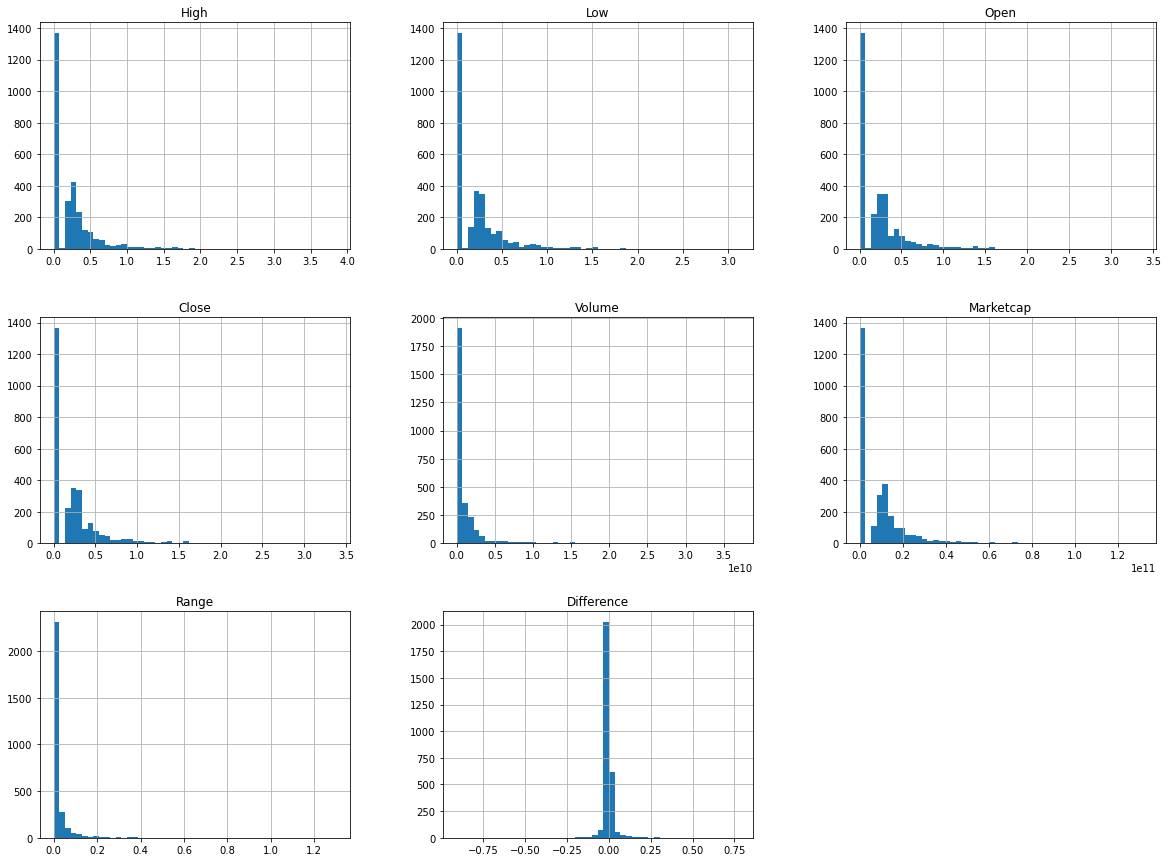

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,1617,2844,1625,1618,1614,2837,2811,1641,1630,1639
Date,2018-01-08 23:59:59,2021-05-19 23:59:59,2018-01-16 23:59:59,2018-01-09 23:59:59,2018-01-05 23:59:59,2021-05-12 23:59:59,2021-04-16 23:59:59,2018-02-01 23:59:59,2018-01-21 23:59:59,2018-01-30 23:59:59
Difference,-0.90736,-0.522957,-0.49912,-0.34168,-0.2521,-0.231273,-0.201777,-0.19835,-0.19619,-0.18962


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,1607,1612,1599,1592,2805,2821,2808,1627,1616,2800
Date,2017-12-29 23:59:59,2018-01-03 23:59:59,2017-12-21 23:59:59,2017-12-14 23:59:59,2021-04-10 23:59:59,2021-04-26 23:59:59,2021-04-13 23:59:59,2018-01-18 23:59:59,2018-01-07 23:59:59,2021-04-05 23:59:59
Difference,0.77503,0.64127,0.410545,0.393615,0.354134,0.333322,0.323921,0.291,0.28485,0.27377


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [13]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

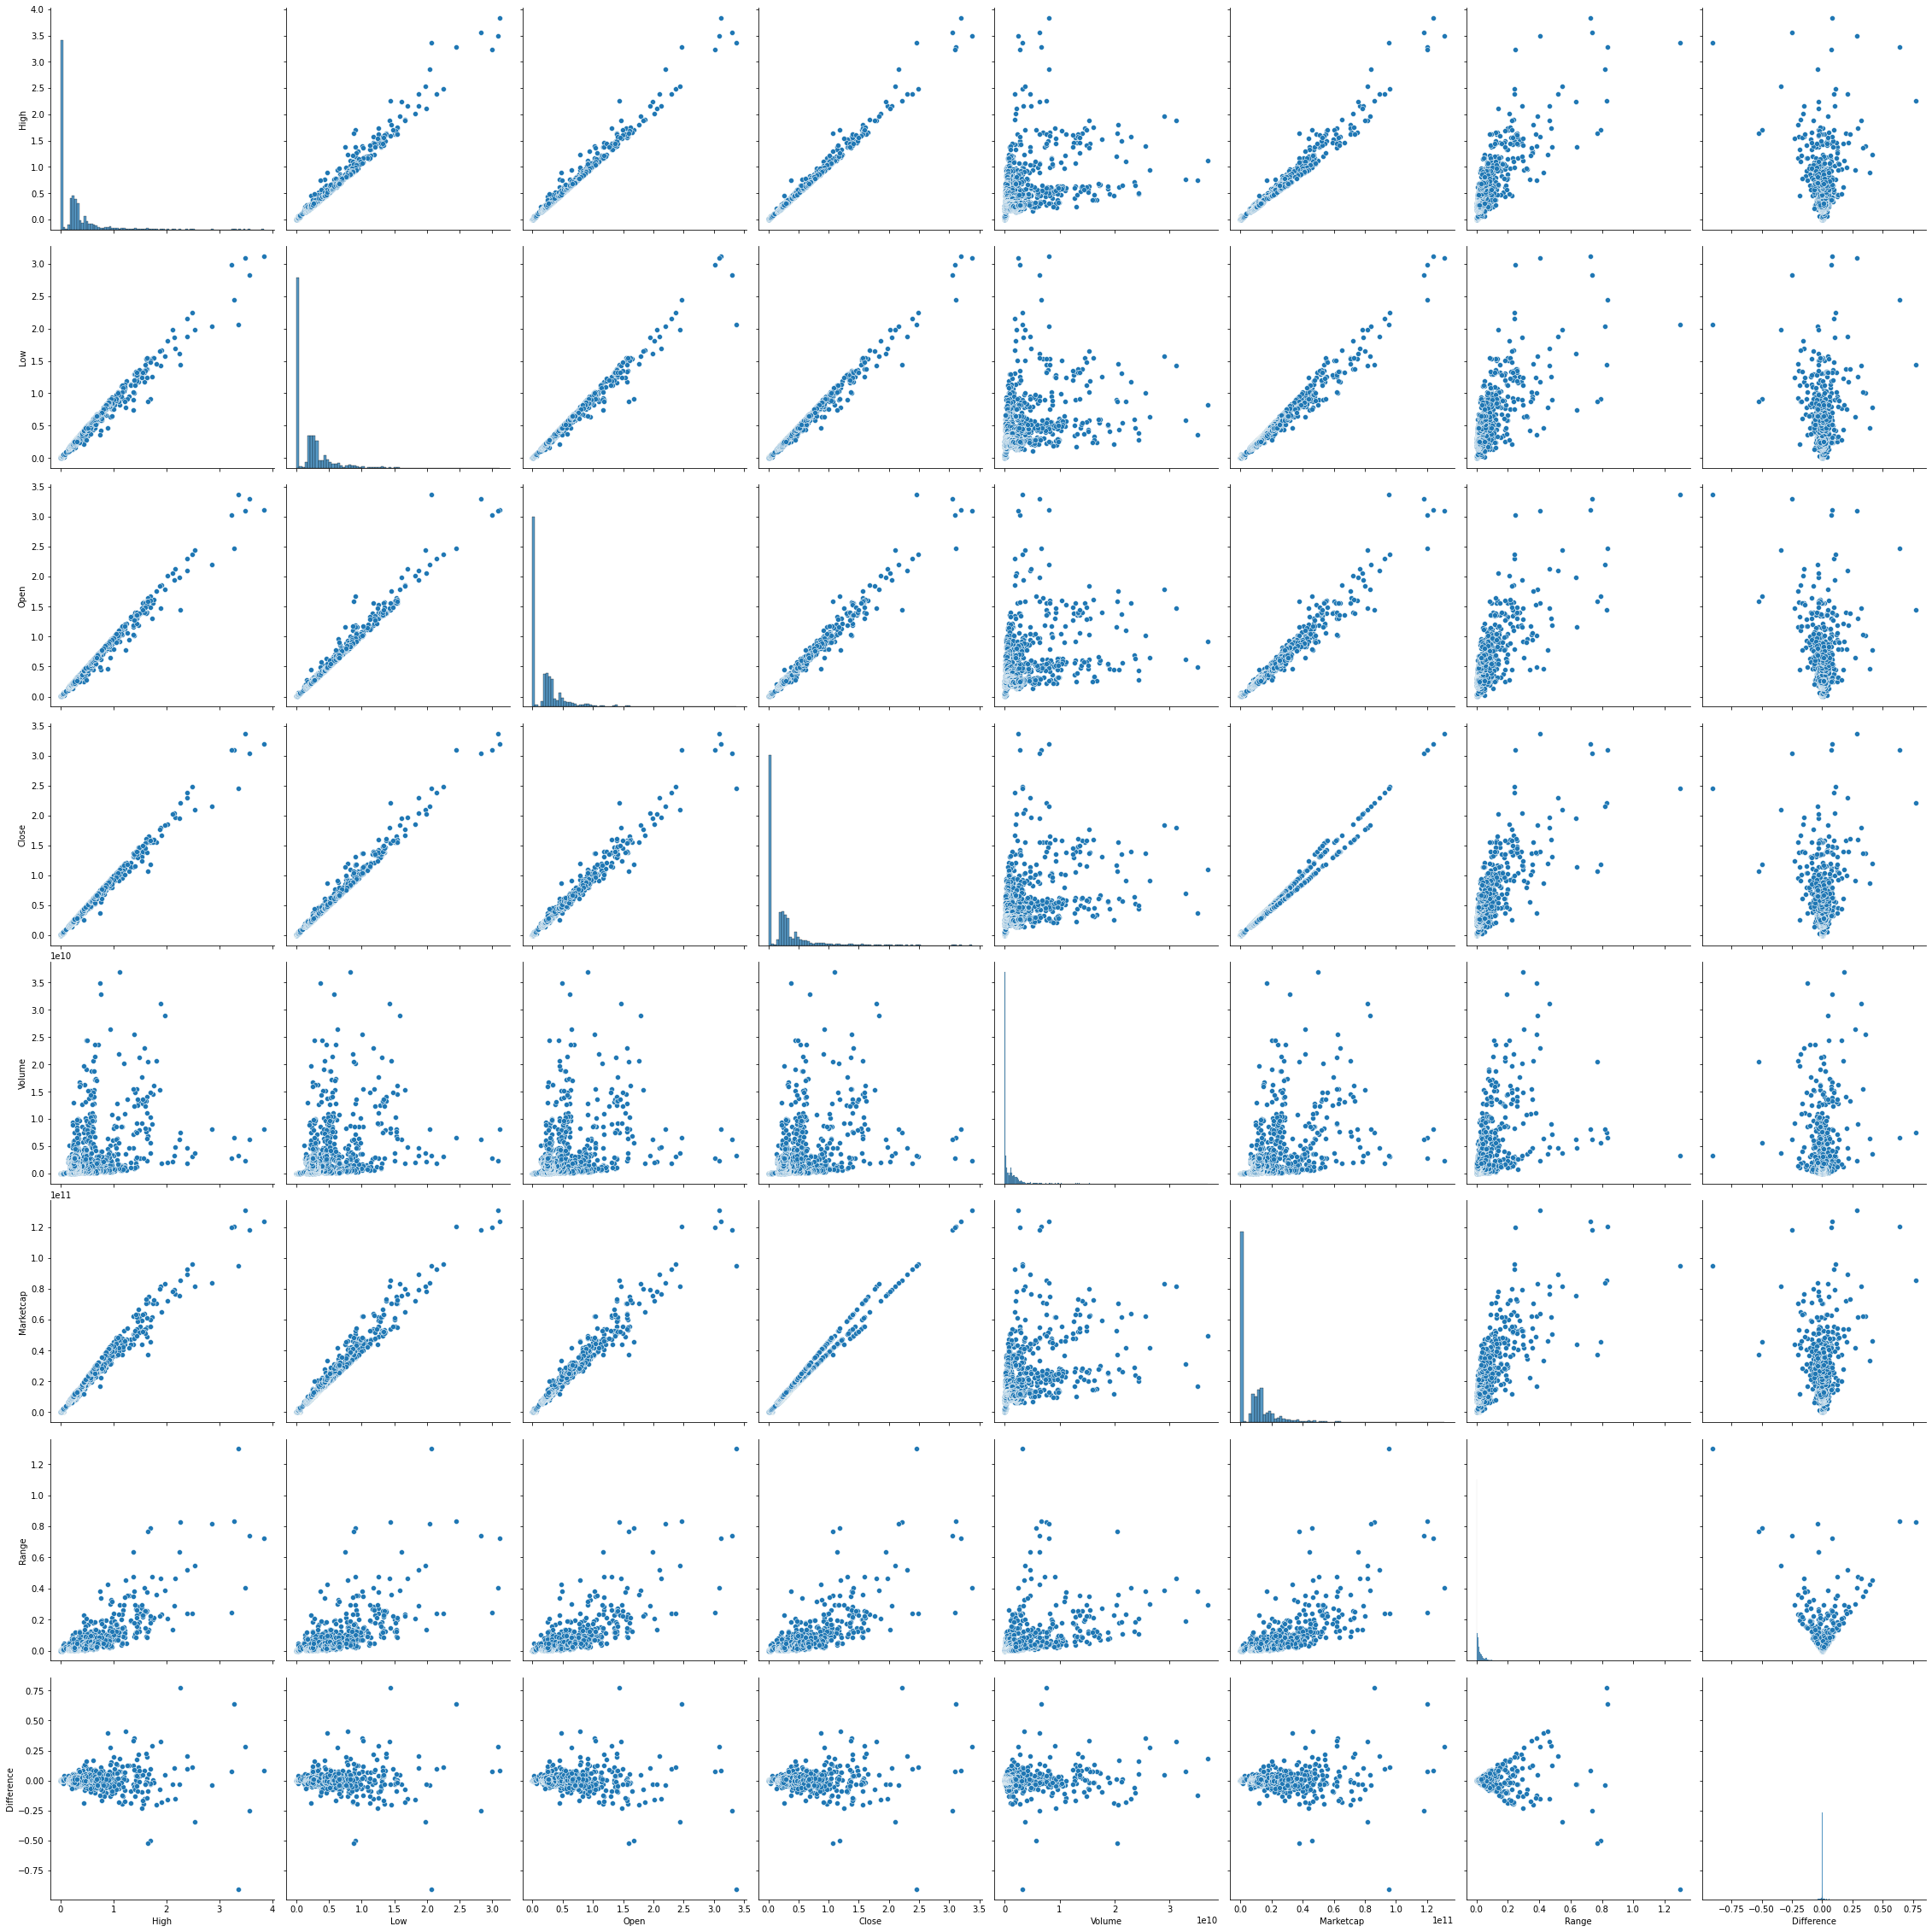

In [15]:
sns.pairplot(data,height=4);
